# 1) Leia o arquivo lemonades.csv usando pandas

In [0]:
import pandas as pd

file_lemonades_csv = pd.read_csv('./Lemonades.csv', sep = ";")
df = file_lemonades_csv
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25
3,07/04/2016,Beach,134,99,76,98.0,0.25
4,07/05/2016,Beach,159,118,78,135.0,0.25


# 2) retorne as informações sobre as colunas e as principais estatísticas sobre o dataset

In [0]:
df.describe().round(2)

,Lemon,Orange,Temperature,Leaflets,Price
count,32.00,32.00,32.00,31.00,32.00
mean,116.16,80.00,78.97,108.55,0.35
std,25.82,21.86,4.07,20.12,0.11
min,71.00,42.00,70.00,68.00,0.25
25%,98.00,66.75,77.00,90.00,0.25
50%,113.50,76.50,80.50,108.00,0.35
75%,131.75,95.00,82.00,124.00,0.50
max,176.00,129.00,84.00,158.00,0.50


# 3)Realize a limpeza do dataset:
### - verifique se existe valores nulos
### - remova duplicatas
### - trate os elementos faltantes (interpolação e media)

In [0]:
import datetime

#verificar nulos
print(df.isnull().sum())

#removendo duplicatas
df.drop_duplicates(inplace=True)

# preenchendo Leaflets com a media da coluna
df['Leaflets'].fillna(df.Leaflets.mean(),inplace=True)

## Preenchendo as datas faltantes
df['Date'] = pd.to_datetime(df['Date'])
g = df['Date'].notnull().cumsum()
df['Date'] = df['Date'].ffill() + df['Date'].groupby(g).cumcount().apply(lambda x: datetime.timedelta(days=x))
df.set_index('Date',inplace=True)
df.head(10)

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64


,Location,Lemon,Orange,Temperature,Leaflets,Price
Date,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25
2016-07-02,Park,98,67,72,90.0,0.25
2016-07-03,Park,110,77,71,104.0,0.25
2016-07-04,Beach,134,99,76,98.0,0.25
2016-07-05,Beach,159,118,78,135.0,0.25
2016-07-06,Beach,103,69,82,90.0,0.25
2016-07-07,Beach,143,101,81,135.0,0.25
2016-07-08,Beach,123,86,82,113.0,0.25
2016-07-09,Beach,134,95,80,126.0,0.25


# 4) Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja

In [0]:
df['Sales'] = df['Lemon'] + df['Orange']
df.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
Date,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25,164
2016-07-02,Park,98,67,72,90.0,0.25,165
2016-07-03,Park,110,77,71,104.0,0.25,187
2016-07-04,Beach,134,99,76,98.0,0.25,233
2016-07-05,Beach,159,118,78,135.0,0.25,277


# 5) Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)

In [0]:
df['Revenue'] = df['Sales'] * df['Price']
df.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2016-07-03,Park,110,77,71,104.0,0.25,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25


# 6) retorne o lucro total

In [0]:
df['Revenue'].sum()

2138.0

# 7) escreva uma função que receba dois parâmetros, dataset e temp(int). 
### Se max for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do
### período observado; se -1, retorna a temperatura mínima

In [0]:
def temp_price(df,temp):
    if temp == 1:
        return df['Temperature'].max()
    elif temp == 0:
        return df['Temperature'].mean()
    elif temp == -1:
        return df['Temperature'].min()
    
print('temp max:',temp_price(df,1))
print('temp median: {0:.2f}'.format(temp_price(df,0)))
print('temp min:',temp_price(df,-1))

temp max: 84
temp median: 78.87
temp min: 70


# 8) escreva uma função que receba dois parametros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach'


In [0]:
def location_price(df, location):
    aux = df.copy()
    coef = 1.15 if 'Park' in location else 1.1
    aux['Price'] = aux['Price'].apply(lambda x: x * coef)
    return aux

# location: Beach
location_price(df,'Beach').head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.275,164,41.00
2016-07-02,Park,98,67,72,90.0,0.275,165,41.25
2016-07-03,Park,110,77,71,104.0,0.275,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.275,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.275,277,69.25


In [0]:
# location: Park
location_price(df,'Park').head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.2875,164,41.00
2016-07-02,Park,98,67,72,90.0,0.2875,165,41.25
2016-07-03,Park,110,77,71,104.0,0.2875,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.2875,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.2875,277,69.25


# 9) escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank


In [0]:
def temp_rank(df):
    df.sort_values(by='Temperature', ascending=False, inplace=True)
    df['temp_rank'] = df.Temperature.notnull().cumsum()
    return df
temp_rank(df).head(10)

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,temp_rank
Date,,,,,,,,,
2016-07-25,Park,156,113,84,135.0,0.50,269,134.50,1
2016-07-12,Beach,130,95,84,99.0,0.25,225,56.25,2
2016-07-26,Park,176,129,83,158.0,0.35,305,106.75,3
2016-07-11,Beach,162,120,83,135.0,0.25,282,70.50,4
2016-07-10,Beach,140,98,82,131.0,0.25,238,59.50,5
2016-07-24,Park,121,82,82,117.0,0.50,203,101.50,6
2016-07-28,Park,96,63,82,90.0,0.35,159,55.65,7
2016-07-31,Beach,76,47,82,68.0,0.35,123,43.05,8
2016-07-08,Beach,123,86,82,113.0,0.25,209,52.25,9


# 10) Imprima um gráfico de linha que retorne o lucro ao longo do tempo

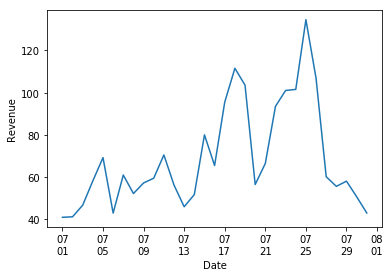

In [0]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df.sort_index(inplace=True)
xaxis = df.iloc[:,0:0]
yaxis = df.iloc[:,7:8]

ax = plt.gca()
xaxis = mdates.date2num(xaxis)
hfmt = mdates.DateFormatter('%m\n%d')
ax.xaxis.set_major_formatter(hfmt)

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.plot(yaxis)
plt.show()

# 11) crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados?

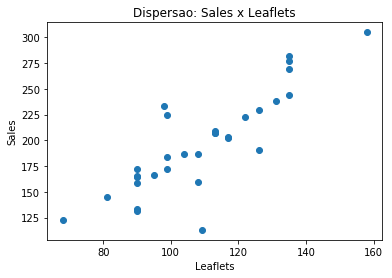

In [0]:
leaflets = df.iloc[:,4:5]
leaflets.reset_index(drop=True,inplace=True)

sales = df.iloc[:,6:7]
sales.reset_index(drop=True,inplace=True)

plt.scatter(leaflets,sales)
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.title('Dispersao: Sales x Leaflets')
plt.show()

In [0]:
import numpy as np
from scipy import stats as sts

leaflets_list = leaflets['Leaflets'].tolist()
sales_list = sales['Sales'].tolist()

print('pearson coef: {0:.2f}'.format(sts.pearsonr(leaflets_list,sales_list)[0]))

# Visualmente percebe-se possível relacao linear entre panfletagem e vendas e de fato o coeficiente de correlação de Pearson
# indica que há uma correlacao forte entre as variáveis aleatórias (p > 0.8)

pearson coef: 0.84


# 12) crie um histograma que mostre o lucro (revenue) com 10 bins

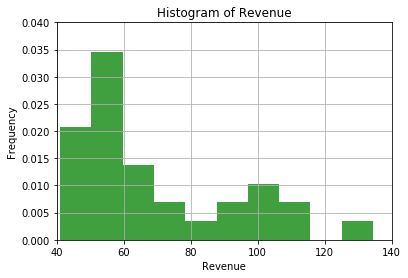

In [0]:
revenues = df['Revenue'].copy()
revenues.reset_index(drop=True,inplace=True)

plt.hist(revenues, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.axis([40, 140, 0, 0.04])
plt.grid(True)
plt.show()

# 13) crie um gráfico de linha que compute o lucro por tipo de fruta ao longo do tempo.

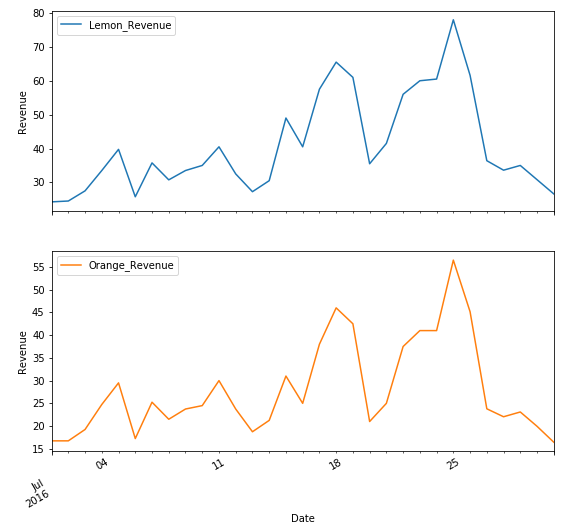

In [0]:
df_new = df.copy()

df_new['Lemon_Revenue'] = df_new.Lemon * df_new.Price
df_new['Orange_Revenue'] = df_new.Orange * df_new.Price

columns_plot = ['Lemon_Revenue', 'Orange_Revenue']
axis = df_new[columns_plot].plot(subplots=True, figsize=(9, 9))
for ax in axis:
    ax.set_ylabel('Revenue')

# 14) usando regressão linear, prediga vendas a partir de:
- temperature
- leaflets
- price
- retorne o gráfico com a reta ajustada aos dados para cada variável

In [ ]:
#cópia do Dataset
df_lr = df.copy()
df_lr['Leaflets'] = df_lr['Leaflets'].astype('int')
df_lr.reset_index(drop=True,inplace=True)
df_lr.head()

In [ ]:
import altair as alt

In [ ]:
class LinearRegression():
    
    def cost_function(self,X,y,theta):
        m = len(y) #número de amostras
        J = 0 # custo
        
        for i in range(m):
            J = J + np.power((theta[0] + theta[1] * X[1][i] - y[i]),2)
        
        return J*(1/(2*m))
    
    def gradient_descent(self,X,y,theta,alpha,num_iter):
        m = len(y)
        J_history = np.zeros(num_iter)
        temp0 = 0
        temp1 = 0
        
        for k in range(num_iter):
        
            for i in range(m):
                temp0 = temp0 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))
                temp1 = temp1 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))*X[1][i]
                theta[0] = temp0
                theta[1] = temp1
                
            J_history[k] = self.cost_function(X,y,theta)
    
        return theta,J_history

In [ ]:
#df_temp_sales = df_lr[['Temperature','Sales']]
df_leafs_sales = df_lr[['Leaflets','Sales']].astype('float')
#df_price_sales = df_lr[['Price','Sales']]

In [0]:
data_plot_LS = alt.Chart(df_leafs_sales).mark_circle(size=60).encode(
    x='Leaflets:Q',
    y='Sales:Q'
)
data_plot_LS

Chart({
  data:     Leaflets  Sales
  0       90.0  164.0
  1       90.0  165.0
  2      104.0  187.0
  3       98.0  233.0
  4      135.0  277.0
  5       90.0  172.0
  6      135.0  244.0
  7      113.0  209.0
  8      126.0  229.0
  9      131.0  238.0
  10     135.0  282.0
  11      99.0  225.0
  12      99.0  184.0
  13     113.0  207.0
  14     108.0  160.0
  15      90.0  131.0
  16     126.0  191.0
  17     122.0  223.0
  18     113.0  207.0
  19     109.0  113.0
  20      90.0  133.0
  21     108.0  187.0
  22     117.0  202.0
  23     117.0  203.0
  24     135.0  269.0
  25     158.0  305.0
  26      99.0  172.0
  27      90.0  159.0
  28      95.0  166.0
  29      81.0  145.0
  30      68.0  123.0,
  encoding: FacetedEncoding({
    x: X({
      field: 'Leaflets',
      type: 'quantitative'
    }),
    y: Y({
      field: 'Sales',
      type: 'quantitative'
    })
  }),
  mark: MarkDef({
    size: 60,
    type: 'circle'
  })
})

In [0]:
x = df_leafs_sales.iloc[0:,0:1]
ones = np.ones(len(df_leafs_sales))
x.insert(0,len(x.columns) + 1,ones)
y = df_leafs_sales.iloc[:,1]
theta = np.zeros(len(x.columns))
x.columns = range(x.shape[1])
iterations = 60
alpha = 0.1

In [0]:
lr = LinearRegression()

In [0]:
cost = lr.cost_function(x,y,theta)
cost

20517.24193548387

In [0]:
theta_lr, custo_h = lr.gradient_descent(x,y,theta,alpha,iterations)
theta_lr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


array([nan, nan])

# 15) usando regressão linear, prediga vendas a partir das três variáveis juntas

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#inicialização de variáveis
feature_col = ['Temperature','Leaflets','Price']
meta_col = ['Sales']

#criação dos datasets para treinamento
X = df_lr[feature_col].values
y = df_lr[meta_col].values
v_test_size = 0.5
v_train_size = 0.5

In [0]:
#treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=v_test_size, train_size=v_train_size)

In [0]:
#criação do modelo
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#predição
y_pred = model_lr.predict(X_test)
y_pred

array([172.61728166, 198.54159797, 175.63223009, 271.45885412,
       183.5312405 , 203.04983599, 136.93405318, 262.64868333,
       174.94272792, 206.40302737, 182.40840479, 165.95846282,
       133.65986553, 250.81742292, 231.4100421 , 223.5486127 ])

In [0]:
mean_squared_error(y_test,y_pred)

469.44079610204494

In [0]:
#testando com as três variáveis
pred_value = [[70, 90, 0.25]] #Temperature / Leaflets / Price
model_lr.predict(pred_value)

array([170.4344899])

# 16) Usando a Regressão Linear implementada em sala como modelo, generalize o algoritmo para que ele possa ser usado para regressão multivariada

In [0]:
import numpy as np
from functools import reduce
import operator
  
class LinearRegressionMulti():
  
  def __sum_values(self,arr_values):
    aux = np.array([0])
    for line in arr_values:
      x = sum(line)
      aux = np.vstack([aux, x])
    return aux[1:]

  def __sub_values(self,arr_values):
    aux = np.array([0])
    for line in arr_values:
      x = reduce(operator.sub, line)
      aux = np.vstack([aux, x])
    return aux[1:]

  def cost_function(self,X,y,theta):
      m = len(y) #número de amostras
      J = 0 # custo

      X_calc = self.__sub_values(X)

      for i in range(m):
          J = J + np.power((theta[0] + theta[1] * X_calc[i] - y[i]),2)

      return J*(1/(2*m))

  def gradient_descent(self,X,y,theta,alpha,num_iter):
      m = len(y)
      J_history = np.zeros(num_iter)
      temp0 = 0
      temp1 = 0

      X_calc = self.__sub_values(X)

      for k in range(num_iter):

          for i in range(m):
              temp0 = temp0 - alpha * (1/m * (theta[0] + theta[1] * X_calc[i] - y[i]))
              temp1 = temp1 - alpha * (1/m * (theta[0] + theta[1] * X_calc[i]))*X_calc[i]
              theta[0] = temp0
              theta[1] = temp1

          J_history[k] = self.cost_function(X,y,theta)

      return theta,J_history

#17) aplique o algoritmo implementado no conjunto de dados consumo cerveja usando as mesmas features para treinamento. Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning

In [0]:
df_beer = pd.read_csv('./Consumo_cerveja.csv',nrows=365,delimiter=';')
df_beer = df_beer.rename(columns={'Temperatura Media (C)':'meanTemp','Temperatura Minima (C)':'minTemp','Temperatura Maxima (C)':'maxTemp',
                       'Precipitacao (mm)':'precip','Final de Semana':'weekend','Consumo de cerveja (litros)':'consumo'})
df_beer.head()

,Data,meanTemp,minTemp,maxTemp,precip,weekend,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [0]:
feature_col = ['maxTemp','precip','weekend']

arr_values = df_beer[feature_col].values

aux = np.array([0])
for line in arr_values:
  x = sum(line)
  aux = np.vstack([aux, x])

aux

In [0]:
feature_col = ['maxTemp','precip','weekend']
meta_col = ['consumo']

X = df_beer[feature_col].values
Y = df_beer[meta_col].values
theta = np.zeros(len(X))
iterations = 1500
alpha = 0.01

In [0]:
lr = LinearRegressionMulti()

In [0]:
custo = lr.cost_function(X,Y,theta)
custo

array([332.26444391])

In [0]:
theta_lr, custo_h = lr.gradient_descent(X,Y,theta,alpha,iterations)
theta_lr

array([89.47521273, -2.63951165,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [0]:
theta_lr.shape

(365,)